<a href="https://colab.research.google.com/github/LoTzuChin/113-1-FinancialBigData/blob/main/QuantitativeTrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31227 (\N{CJK UNIFIED IDEOGRAPH-79FB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21205 (\N{CJK UNIFIED IDEOGRAPH-52D5}) missi

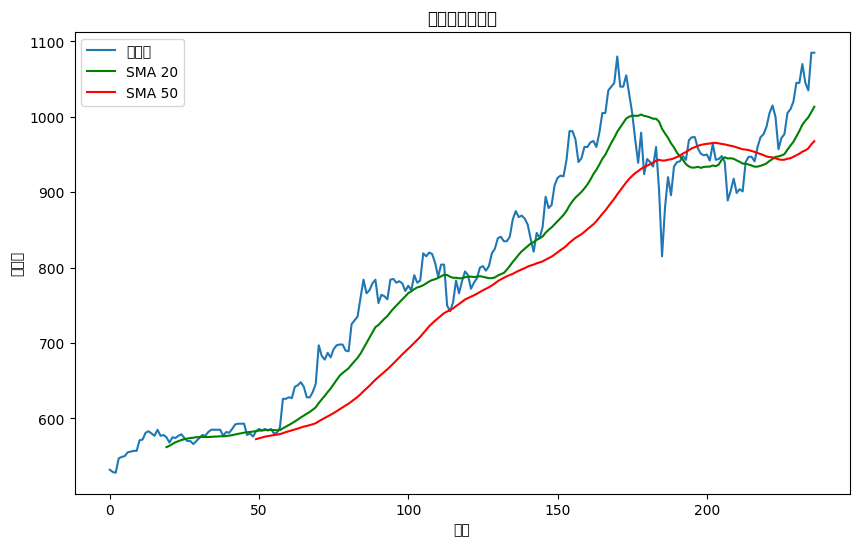

<ipython-input-10-25d9848e6c53>:36: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Position'][20:] = np.where(df['SMA_20'][20:] > df['SMA_50'][20:], 1, 0)
<ipython-input-10-25d9848e6c53>:36: SettingWithCopyWarning: 
A value is trying to b

      Close   SMA_20  SMA_50  Position  Buy/Sell
232  1070.0   989.65  953.80         1       0.0
233  1045.0   994.90  955.50         1       0.0
234  1035.0   999.30  958.14         1       0.0
235  1085.0  1006.20  963.54         1       0.0
236  1085.0  1013.40  967.64         1       0.0


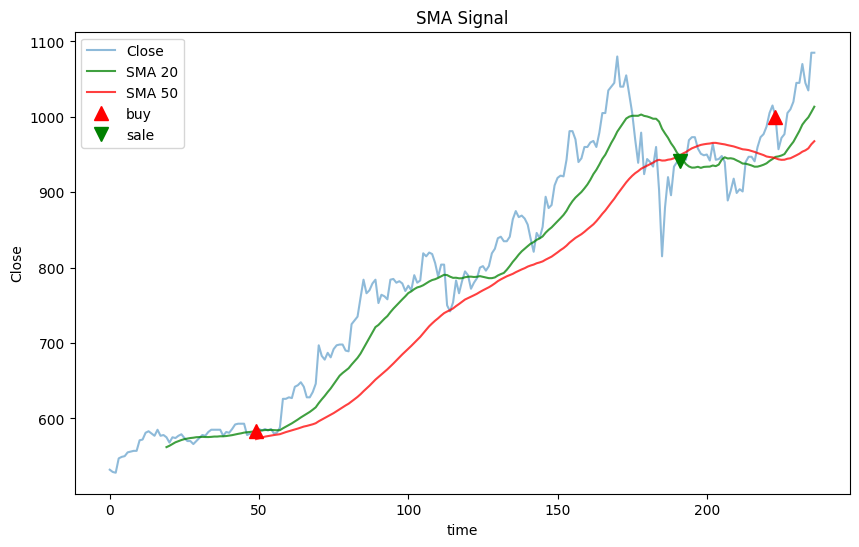

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import numpy as np

# 載入歷史股票數據
stock_id = "2330.tw"

end = dt.date.today()
start = end - dt.timedelta(days=360)

df = yf.download(stock_id, start = start, end = end).reset_index()

# 假設我們有 '收盤' 欄位，轉換為數字型態
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df = df.dropna()

# 計算移動平均線
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# 繪製移動平均線策略圖表
plt.figure(figsize=(10,6))
plt.plot(df['Close'], label='收盤價')
plt.plot(df['SMA_20'], label='SMA 20', color='green')
plt.plot(df['SMA_50'], label='SMA 50', color='red')
plt.title('移動平均線策略')
plt.xlabel('時間')
plt.ylabel('收盤價')
plt.legend()
plt.show()

# 設計交易策略 (買入/賣出)
df['Position'] = 0  # 0: 沒有持倉, 1: 持有股票
df['Position'][20:] = np.where(df['SMA_20'][20:] > df['SMA_50'][20:], 1, 0)

# 計算持倉變化
df['Buy/Sell'] = df['Position'].diff()

# 檢查交易信號
print(df[['Close', 'SMA_20', 'SMA_50', 'Position', 'Buy/Sell']].tail())

# 繪製交易信號的可視化
plt.figure(figsize=(10,6))
plt.plot(df['Close'], label='Close', alpha=0.5)
plt.plot(df['SMA_20'], label='SMA 20', color='green', alpha=0.75)
plt.plot(df['SMA_50'], label='SMA 50', color='red', alpha=0.75)

# 標註買入賣出點
plt.plot(df[df['Buy/Sell'] == 1].index, df['Close'][df['Buy/Sell'] == 1], '^', markersize=10, color='r', label='buy')
plt.plot(df[df['Buy/Sell'] == -1].index, df['Close'][df['Buy/Sell'] == -1], 'v', markersize=10, color='g', label='sale')

plt.title('SMA Signal')
plt.xlabel('time')
plt.ylabel('Close')
plt.legend()
plt.show()


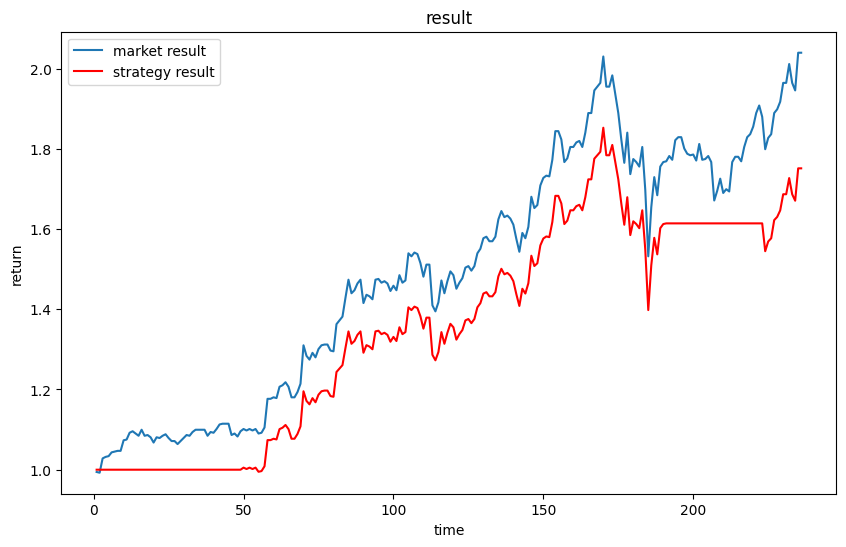

In [9]:
# 計算策略的收益
df['Market Return'] = df['Close'].pct_change()
df['Strategy Return'] = df['Market Return'] * df['Position'].shift(1)

# 累積收益
df['Cumulative Market Return'] = (1 + df['Market Return']).cumprod()
df['Cumulative Strategy Return'] = (1 + df['Strategy Return']).cumprod()

# 繪製策略回測結果
plt.figure(figsize=(10,6))
plt.plot(df['Cumulative Market Return'], label='market result')
plt.plot(df['Cumulative Strategy Return'], label='strategy result', color='red')
plt.title('result')
plt.xlabel('time')
plt.ylabel('return')
plt.legend()
plt.show()
